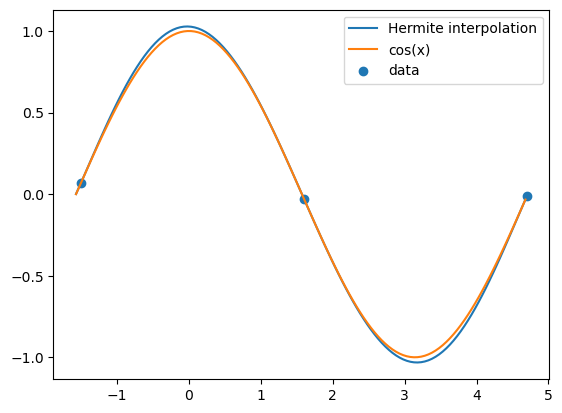

In [11]:
#Firzandi Ahsan Dwi Styana
#21537144016


using PyPlot


function hdiff(x::Array,y::Array,yprime::Array)
    m = length(x) 
    l = 2m
    z = Array{Float64}(undef, l)
    a = Array{Float64}(undef, l)
    
    for i in 1:m
        z[2i - 1] = x[i]
        z[2i] = x[i]
    end
    
    for i in 1:m
        a[2i - 1] = y[i]
        a[2i] = y[i]
    end

    for i in reverse(collect(2:m)) 
        a[2i] = yprime[i]
        a[2i - 1] = (a[2i - 1] - a[2i - 2]) / (z[2i - 1] -z[2i - 2])
    end
    
    a[2] = yprime[1]
    for j in 3:l 
        for i in reverse(collect(j:l))
            a[i] = (a[i] -a[i - 1]) / (z[i] -z[i - (j - 1)])
        end
    end
    return(a)
end


hdiff([-1.5, 1.6, 4.7], [0.071, -0.029, -0.012], [1, -1, 1])

function hermite(x::Array,y::Array,yprime::Array,w)
    m = length(x) 
    a = hdiff(x, y, yprime)
    z = Array{Float64}(undef, 2m)
    
    for i in 1:m
        z[2i - 1] = x[i]
        z[2i] = x[i]
    end
    
    sum = a[1]
    pr = 1.0
    
    for j in 1:(2m - 1)
        pr = pr * (w - z[j])
        sum = sum + a[j + 1] * pr
    end
    return sum
end


xaxis = -pi / 2 : 1 / 20 : 3 * pi / 2
x = [-1.5, 1.6, 4.7]
y = [0.071, -0.029, -0.012]
yprime = [1, -1, 1]
funct = map(cos, xaxis)
interp = map(w -> hermite(x, y, yprime, w), xaxis)
plot(xaxis, interp, label = "Hermite interpolation")
plot(xaxis, funct, label = "cos(x)")
scatter(x, y, label = "data")
legend(loc = "upper right");

plot (generic function with 1 method)

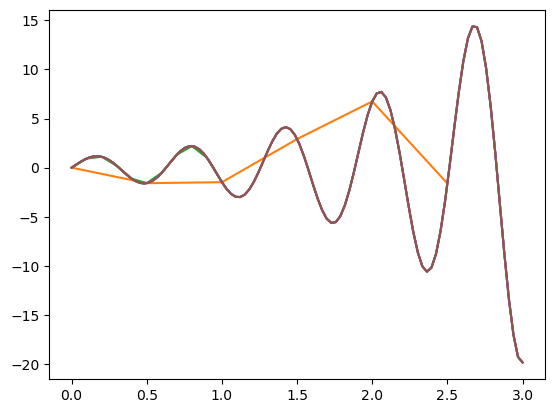

In [12]:
#Firzandi Ahsan Dwi Styana
#21537144016


using PyPlot


f(x) = exp(x) * sin(10x)

x = [0, 3]


x_hermite = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
y_hermite = [f(x) for x in x_hermite]


x_polinomial = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y_polinomial = [f(x) for x in x_polinomial]


x_fungsi = range(0, 3, length=100)
y_fungsi = [f(x) for x in x_fungsi]
plot(x_fungsi, y_fungsi)

plot(x_hermite, y_hermite, label="Interpolasi Hermite")

plot(x_polinomial, y_polinomial, label="Interpolasi Polinomial")

plot(x_fungsi, y_fungsi, label="Fungsi Asli")


f(x) = exp(x) * sin(10x)
x = range(0, 3, length=100)
y = [f(x) for x in x]
plot(x, y, label="f(x) = e^x sin 10x")
plot(x, y)
display(plot)